## Import Libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor , plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
import xgboost as XGB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Preprocessing Data

In [5]:
# load data
game_df = pd.read_csv("GameData.csv")
game_df.shape

(403, 386)

In [6]:
# make columns to lower case
game_df.columns = game_df.columns.str.lower().str.strip() 
# game_df

In [7]:
# check null
game_df.isnull().sum()

gamename                     0
string_java.lang.string      0
off_int                      0
end_int                      0
int_int                    389
                          ... 
category                     0
region                       0
originyear                   0
bestagent                    0
uct                          0
Length: 386, dtype: int64

In [8]:
# split predicting columns
y_category = game_df["category"] # classification
y_region = game_df["region"] # classification
y_origin = game_df["originyear"] # regression
y_best = game_df["bestagent"] # classification
y_uct = game_df["uct"] # regression

# drop columns
game_df_reduced = game_df.drop(game_df.columns[-5:], axis =1)

In [9]:
# y_category.value_counts()
y_region.value_counts()
# y_best.value_counts()

region
Southern Asia        83
Eastern Africa       41
Southern Europe      38
Western Africa       32
Northern Asia        31
Northern Europe      31
Southeastern Asia    27
Eastern Asia         24
Northern Africa      21
Northern America     20
Western Asia         10
Middle Africa         7
Eastern Europe        7
Central Asia          7
Western Europe        7
South America         5
Caribbean             4
Polynesia             3
Central America       2
Micronesia            2
Southern Africa       1
Name: count, dtype: int64

In [10]:
# y_region has a class that has 1 in the group
# put every class < 7 into "others"
region_counts = y_region.value_counts()
y_region_transformed = y_region.apply(lambda x: x if region_counts[x] >= 7 else "Others")
y_region_transformed.value_counts()

region
Southern Asia        83
Eastern Africa       41
Southern Europe      38
Western Africa       32
Northern Asia        31
Northern Europe      31
Southeastern Asia    27
Eastern Asia         24
Northern Africa      21
Northern America     20
Others               17
Western Asia         10
Middle Africa         7
Eastern Europe        7
Central Asia          7
Western Europe        7
Name: count, dtype: int64

In [11]:
# drop null and impute
game_df_reduced_droped = game_df_reduced.drop(["gamename", "int_int"], axis=1)

# impute dataset
imp = SimpleImputer(strategy = "mean") 
game_df_reduced_droped_imputed = imp.fit_transform(game_df_reduced_droped)

# put back columns name
game_cleaned = pd.DataFrame(game_df_reduced_droped_imputed)
game_cleaned.columns = game_df_reduced_droped.columns
game_cleaned

,string_java.lang.string,off_int,end_int,undefined_int,piece_game.equipment.component.piece,board_game.equipment.container.board.board,mancalaboard_game.equipment.container.board.custom.mancalaboard,track_game.equipment.container.board.track,dice_game.equipment.container.other.dice,hand_game.equipment.container.other.hand,...,fl_game.util.directions.relativedirection,fll_game.util.directions.relativedirection,bl_game.util.directions.relativedirection,bll_game.util.directions.relativedirection,fr_game.util.directions.relativedirection,frr_game.util.directions.relativedirection,br_game.util.directions.relativedirection,brr_game.util.directions.relativedirection,samedirection_game.util.directions.relativedirection,oppositedirection_game.util.directions.relativedirection
0,55.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,3.0,3.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,4.0,6.0,0.0,3.0,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualisation Game Dataset (reduce dimension and clustering)

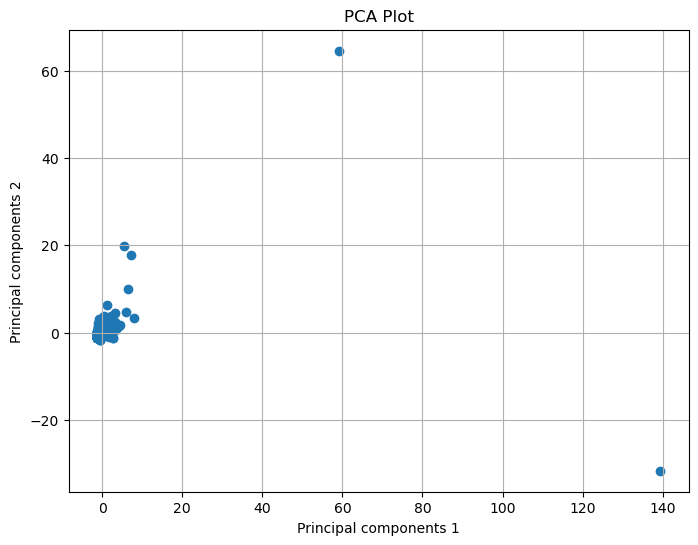

In [13]:
# set seed
np.random.seed(42)
random.seed(42)

# scale data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(game_cleaned)

# principal component analysis (PCA) plot
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# plot game
plt.figure(figsize=(8, 6))
plot = plt.scatter(data_pca[:,0], data_pca[:,1])
plt.title("PCA Plot")
plt.xlabel("Principal components 1")
plt.ylabel("Principal components 2")
plt.grid(True)
plt.show()

# might not good for analysis because there are outliers 

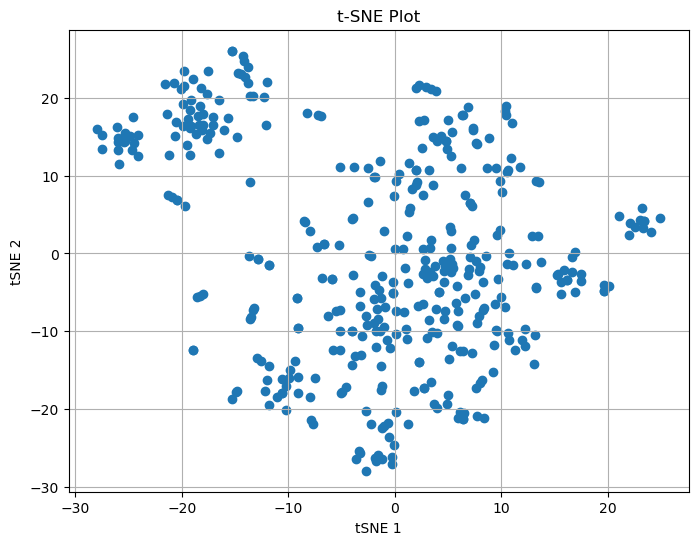

In [14]:
# set seed
np.random.seed(42)
random.seed(42)

# scale data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(game_cleaned)

# tsne
tsne = TSNE()
data_tsne = tsne.fit_transform(data_scaled)

# plot tsne
plt.figure(figsize=(8, 6))
plot = plt.scatter(data_tsne[:,0], data_tsne[:,1])
plt.title("t-SNE Plot")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.grid(True)
plt.show()

Text(0.5, 0, 'n_clusters')

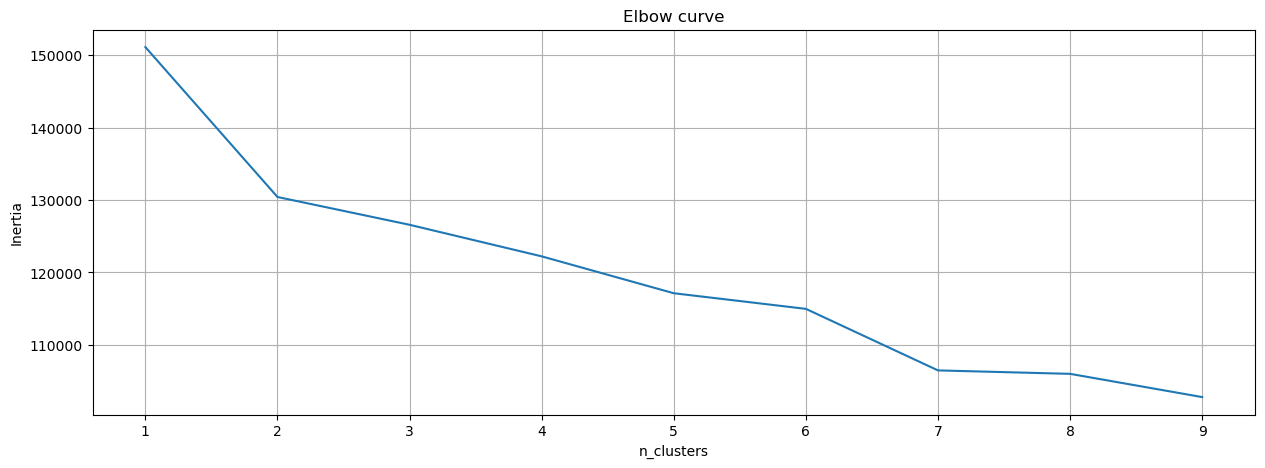

In [15]:
# set seed
np.random.seed(42)
random.seed(42)

# kmean clustering check cluster 
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_scaled)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize = (15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title("Elbow curve")
plt.ylabel("Inertia")
plt.xlabel("n_clusters")

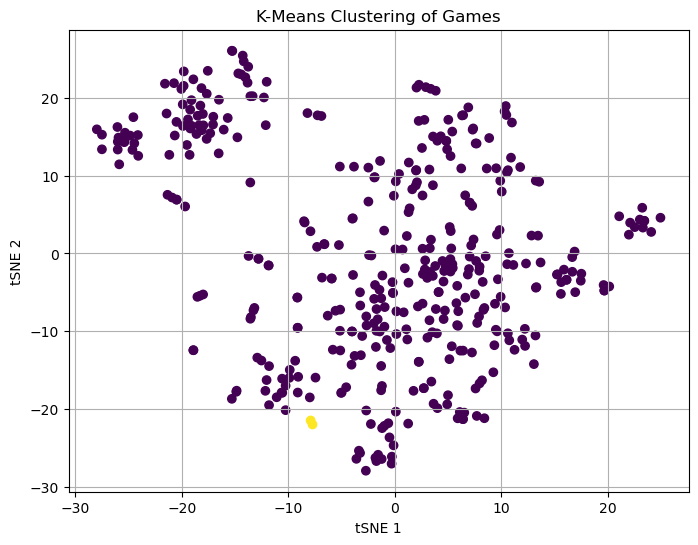

In [16]:
# set seed
np.random.seed(42)
random.seed(42)

# apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)

# visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Games')
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.grid(True)
plt.show()

## Models Selection for classification

In [18]:
# Kneighbors
knn = KNeighborsClassifier()
# Linear
log = LogisticRegression()
# DecisionTree
dtc = DecisionTreeClassifier(random_state = 42)
# Ensemble
bag = BaggingClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
xgb = XGB.XGBClassifier(random_state = 42)
# set kfold = 10
kfold = KFold(n_splits = 5, shuffle =True, random_state = 42)

### Predicting Category

In [20]:
# set seed
np.random.seed(42)
random.seed(42)

# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_category, 
                                                    test_size = 0.2, stratify = y_category, random_state = 42)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models
# KNeighborsClassifier
grids_knn = {"n_neighbors": [1, 3, 5, 10, 50], "weights": ["distance"], "metric": ["euclidean", "cosine", "manhattan", "minkowski"]}
gscv_knn = GridSearchCV(knn, grids_knn, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_knn.fit(X_train_scaled, y_train_encoded)
score_best_estimator_knn = gscv_knn.score(X_test_scaled, y_test_encoded)
print(f"KNeighbors Classification best parameters:", gscv_knn.best_params_)
print(f"KNeighbors Classification Accuracy: {score_best_estimator_knn:.4f}")

# LogisticRegression 
grids_log = {"C": [0.05, 1, 5, 10], "solver": ["lbfgs","liblinear"], "max_iter": [1000, 3000, 5000]}
gscv_log = GridSearchCV(log, grids_log, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_log.fit(X_train_scaled, y_train_encoded)
score_best_estimator_log = gscv_log.score(X_test_scaled, y_test_encoded)
print(f"Logistic Regression best parameters:", gscv_log.best_params_)
print(f"Logistic Regression Accuracy: {score_best_estimator_log:.4f}")

# DecisionTreeClassifier
grids_dtc = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 8], "min_samples_leaf": [1, 2, 3], "max_leaf_nodes":[10, 30, 50], "criterion": ["gini", "entropy"]}
gscv_dtc =  GridSearchCV(dtc, grids_dtc, cv=kfold, n_jobs =-1, scoring= "accuracy")
gscv_dtc.fit(X_train_scaled, y_train_encoded)
score_best_estimator_dtc = gscv_dtc.score(X_test_scaled, y_test_encoded)
print(f"DecisionTree Classification best parameters:", gscv_dtc.best_params_)
print(f"DecisionTree Classification Accuracy: {score_best_estimator_dtc:.4f}")

## Ensemble Learning 
# BaggingClassifier
grids_bag = {"n_estimators": [10, 50, 100], "bootstrap":[True]}
dtc_best = DecisionTreeClassifier(**gscv_dtc.best_params_) # use best parameters from dtc 
bag = BaggingClassifier(estimator=dtc_best)
gscv_bag = GridSearchCV(bag, grids_bag, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_bag.fit(X_train_scaled, y_train_encoded)
score_best_estimator_bag = gscv_bag.score(X_test_scaled, y_test_encoded)
print(f"Bagging Classification best parameters:", gscv_bag.best_params_)
print(f"Bagging Classification Accuracy: {score_best_estimator_bag:.4f}")

# PastingClassifier
grids_past = {"n_estimators": [10, 50, 100], "bootstrap":[False]} 
bag = BaggingClassifier(estimator=dtc_best)# use best parameters from dtc 
gscv_past = GridSearchCV(bag, grids_past, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_past.fit(X_train_scaled, y_train_encoded)
score_best_estimator_past = gscv_past.score(X_test_scaled, y_test_encoded)
print(f"Pasting Classification best parameters:",gscv_past.best_params_)
print(f"Pasting Classification Accuracy: {score_best_estimator_past:.4f}")

# RandomForestClassifier
grids_rf = {"n_estimators": [10, 50, 100], "min_samples_leaf": [5, 10, 20], "criterion": ["gini", "entropy"], "max_features":["sqrt","log2"]}
gscv_rf =  GridSearchCV(rf, grids_rf, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_rf.fit(X_train_scaled, y_train_encoded)
score_best_estimator_rf = gscv_rf.score(X_test_scaled, y_test_encoded)
print(f"RandomForest Classification best parameters:",gscv_rf.best_params_)
print(f"RandomForest Classification Accuracy: {score_best_estimator_rf:.4f}")

# AdaBoostClassifier
grids_ada = {"n_estimators": [10, 50, 100]}
bag = BaggingClassifier(estimator=dtc_best)
gscv_ada = GridSearchCV(bag, grids_ada, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_ada.fit(X_train_scaled, y_train_encoded)
score_best_estimator_ada = gscv_ada.score(X_test_scaled, y_test_encoded)
print(f"AdaBoost Classification best parameters:",gscv_ada.best_params_)
print(f"AdaBoost Classification Accuracy: {score_best_estimator_ada:.4f}")

# XGBoostClassifier
grids_xgb = {"n_estimators": [10, 50, 100]}
gscv_xgb = GridSearchCV(xgb, grids_xgb, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_xgb.fit(X_train_scaled, y_train_encoded)
score_best_estimator_xgb = gscv_xgb.score(X_test_scaled, y_test_encoded)
print(f"XGBoost Classification best parameters:",gscv_xgb.best_params_)
print(f"XGBoost Classification Accuracy: {score_best_estimator_xgb:.4f}")

KNeighbors Classification best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighbors Classification Accuracy: 0.9136
Logistic Regression best parameters: {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.9259


/Users/job/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTree Classification best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree Classification Accuracy: 0.9506
Bagging Classification best parameters: {'bootstrap': True, 'n_estimators': 50}
Bagging Classification Accuracy: 0.9630
Pasting Classification best parameters: {'bootstrap': False, 'n_estimators': 100}
Pasting Classification Accuracy: 0.9383
RandomForest Classification best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
RandomForest Classification Accuracy: 0.9383
AdaBoost Classification best parameters: {'n_estimators': 100}
AdaBoost Classification Accuracy: 0.9753
XGBoost Classification best parameters: {'n_estimators': 50}
XGBoost Classification Accuracy: 0.9506


### Predicting Best Agent

In [22]:
# set seed
np.random.seed(42)
random.seed(42)

# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_best, 
                                                    test_size = 0.2, random_state = 42, stratify = y_best)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models
# KNeighborsClassifier
grids_knn = {"n_neighbors": [1, 3, 5, 10, 50], "weights": ["distance"], "metric": ["euclidean", "cosine", "manhattan", "minkowski"]}
gscv_knn = GridSearchCV(knn, grids_knn, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_knn.fit(X_train_scaled, y_train_encoded)
score_best_estimator_knn = gscv_knn.score(X_test_scaled, y_test_encoded)
print(f"KNeighbors Classification best parameters:", gscv_knn.best_params_)
print(f"KNeighbors Classification Accuracy: {score_best_estimator_knn:.4f}")

# LogisticRegression 
grids_log = {"C": [0.05, 1, 5, 10], "solver": ["lbfgs","liblinear"], "max_iter": [1000, 3000, 5000]}
gscv_log = GridSearchCV(log, grids_log, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_log.fit(X_train_scaled, y_train_encoded)
score_best_estimator_log = gscv_log.score(X_test_scaled, y_test_encoded)
print(f"Logistic Regression best parameters:", gscv_log.best_params_)
print(f"Logistic Regression Accuracy: {score_best_estimator_log:.4f}")

# DecisionTreeClassifier
grids_dtc = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 8], "min_samples_leaf": [1, 2, 3], "max_leaf_nodes":[10, 30, 50], "criterion": ["gini", "entropy"]}
gscv_dtc =  GridSearchCV(dtc, grids_dtc, cv=kfold, n_jobs =-1, scoring= "accuracy")
gscv_dtc.fit(X_train_scaled, y_train_encoded)
score_best_estimator_dtc = gscv_dtc.score(X_test_scaled, y_test_encoded)
print(f"DecisionTree Classification best parameters:", gscv_dtc.best_params_)
print(f"DecisionTree Classification Accuracy: {score_best_estimator_dtc:.4f}")

## Ensemble Learning 
# BaggingClassifier
grids_bag = {"n_estimators": [10, 50, 100], "bootstrap":[True]}
dtc_best = DecisionTreeClassifier(**gscv_dtc.best_params_) # use best parameters from dtc 
bag = BaggingClassifier(estimator=dtc_best)
gscv_bag = GridSearchCV(bag, grids_bag, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_bag.fit(X_train_scaled, y_train_encoded)
score_best_estimator_bag = gscv_bag.score(X_test_scaled, y_test_encoded)
print(f"Bagging Classification best parameters:", gscv_bag.best_params_)
print(f"Bagging Classification Accuracy: {score_best_estimator_bag:.4f}")

# PastingClassifier
grids_past = {"n_estimators": [10, 50, 100], "bootstrap":[False]} 
bag = BaggingClassifier(estimator=dtc_best)# use best parameters from dtc 
gscv_past = GridSearchCV(bag, grids_past, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_past.fit(X_train_scaled, y_train_encoded)
score_best_estimator_past = gscv_past.score(X_test_scaled, y_test_encoded)
print(f"Pasting Classification best parameters:",gscv_past.best_params_)
print(f"Pasting Classification Accuracy: {score_best_estimator_past:.4f}")

# RandomForestClassifier
grids_rf = {"n_estimators": [10, 50, 100], "min_samples_leaf": [5, 10, 20], "criterion": ["gini", "entropy"], "max_features":["sqrt","log2"]}
gscv_rf =  GridSearchCV(rf, grids_rf, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_rf.fit(X_train_scaled, y_train_encoded)
score_best_estimator_rf = gscv_rf.score(X_test_scaled, y_test_encoded)
print(f"RandomForest Classification best parameters:",gscv_rf.best_params_)
print(f"RandomForest Classification Accuracy: {score_best_estimator_rf:.4f}")

# AdaBoostClassifier
grids_ada = {"n_estimators": [10, 50, 100]}
bag = BaggingClassifier(estimator=dtc_best)
gscv_ada = GridSearchCV(bag, grids_ada, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_ada.fit(X_train_scaled, y_train_encoded)
score_best_estimator_ada = gscv_ada.score(X_test_scaled, y_test_encoded)
print(f"AdaBoost Classification best parameters:",gscv_ada.best_params_)
print(f"AdaBoost Classification Accuracy: {score_best_estimator_ada:.4f}")

# XGBoostClassifier
grids_xgb = {"n_estimators": [10, 50, 100]}
gscv_xgb = GridSearchCV(xgb, grids_xgb, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_xgb.fit(X_train_scaled, y_train_encoded)
score_best_estimator_xgb = gscv_xgb.score(X_test_scaled, y_test_encoded)
print(f"XGBoost Classification best parameters:",gscv_xgb.best_params_)
print(f"XGBoost Classification Accuracy: {score_best_estimator_xgb:.4f}")

KNeighbors Classification best parameters: {'metric': 'cosine', 'n_neighbors': 50, 'weights': 'distance'}
KNeighbors Classification Accuracy: 0.5062
Logistic Regression best parameters: {'C': 0.05, 'max_iter': 1000, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.5556


/Users/job/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTree Classification best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree Classification Accuracy: 0.5802
Bagging Classification best parameters: {'bootstrap': True, 'n_estimators': 100}
Bagging Classification Accuracy: 0.5802
Pasting Classification best parameters: {'bootstrap': False, 'n_estimators': 10}
Pasting Classification Accuracy: 0.5802
RandomForest Classification best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
RandomForest Classification Accuracy: 0.5556
AdaBoost Classification best parameters: {'n_estimators': 100}
AdaBoost Classification Accuracy: 0.5679
XGBoost Classification best parameters: {'n_estimators': 50}
XGBoost Classification Accuracy: 0.5556


### Predicting Region

In [24]:
# set seed
np.random.seed(42)
random.seed(42)

# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_region_transformed, 
                                                    test_size = 0.2, stratify = y_region_transformed, random_state = 42)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models
# KNeighborsClassifier
grids_knn = {"n_neighbors": [1, 3, 5, 10, 50], "weights": ["distance"], "metric": ["euclidean", "cosine", "manhattan", "minkowski"]}
gscv_knn = GridSearchCV(knn, grids_knn, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_knn.fit(X_train_scaled, y_train_encoded)
score_best_estimator_knn = gscv_knn.score(X_test_scaled, y_test_encoded)
print(f"KNeighbors Classification best parameters:", gscv_knn.best_params_)
print(f"KNeighbors Classification Accuracy: {score_best_estimator_knn:.4f}")

# LogisticRegression 
grids_log = {"C": [0.05, 1, 5, 10], "solver": ["lbfgs","liblinear"], "max_iter": [1000, 3000, 5000]}
gscv_log = GridSearchCV(log, grids_log, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_log.fit(X_train_scaled, y_train_encoded)
score_best_estimator_log = gscv_log.score(X_test_scaled, y_test_encoded)
print(f"Logistic Regression best parameters:", gscv_log.best_params_)
print(f"Logistic Regression Accuracy: {score_best_estimator_log:.4f}")

# DecisionTreeClassifier
grids_dtc = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 8], "min_samples_leaf": [1, 2, 3], "max_leaf_nodes":[10, 30, 50], "criterion": ["gini", "entropy"]}
gscv_dtc =  GridSearchCV(dtc, grids_dtc, cv=kfold, n_jobs =-1, scoring= "accuracy")
gscv_dtc.fit(X_train_scaled, y_train_encoded)
score_best_estimator_dtc = gscv_dtc.score(X_test_scaled, y_test_encoded)
print(f"DecisionTree Classification best parameters:", gscv_dtc.best_params_)
print(f"DecisionTree Classification Accuracy: {score_best_estimator_dtc:.4f}")

## Ensemble Learning 
# BaggingClassifier
grids_bag = {"n_estimators": [10, 50, 100], "bootstrap":[True]}
dtc_best = DecisionTreeClassifier(**gscv_dtc.best_params_) # use best parameters from dtc 
bag = BaggingClassifier(estimator=dtc_best)
gscv_bag = GridSearchCV(bag, grids_bag, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_bag.fit(X_train_scaled, y_train_encoded)
score_best_estimator_bag = gscv_bag.score(X_test_scaled, y_test_encoded)
print(f"Bagging Classification best parameters:", gscv_bag.best_params_)
print(f"Bagging Classification Accuracy: {score_best_estimator_bag:.4f}")

# PastingClassifier
grids_past = {"n_estimators": [10, 50, 100], "bootstrap":[False]} 
bag = BaggingClassifier(estimator=dtc_best)# use best parameters from dtc 
gscv_past = GridSearchCV(bag, grids_past, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_past.fit(X_train_scaled, y_train_encoded)
score_best_estimator_past = gscv_past.score(X_test_scaled, y_test_encoded)
print(f"Pasting Classification best parameters:",gscv_past.best_params_)
print(f"Pasting Classification Accuracy: {score_best_estimator_past:.4f}")

# RandomForestClassifier
grids_rf = {"n_estimators": [10, 50, 100], "min_samples_leaf": [5, 10, 20], "criterion": ["gini", "entropy"], "max_features":["sqrt","log2"]}
gscv_rf =  GridSearchCV(rf, grids_rf, cv=kfold, n_jobs =-1, scoring="accuracy")
gscv_rf.fit(X_train_scaled, y_train_encoded)
score_best_estimator_rf = gscv_rf.score(X_test_scaled, y_test_encoded)
print(f"RandomForest Classification best parameters:",gscv_rf.best_params_)
print(f"RandomForest Classification Accuracy: {score_best_estimator_rf:.4f}")

# AdaBoostClassifier
grids_ada = {"n_estimators": [10, 50, 100]}
bag = BaggingClassifier(estimator=dtc_best)
gscv_ada = GridSearchCV(bag, grids_ada, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_ada.fit(X_train_scaled, y_train_encoded)
score_best_estimator_ada = gscv_ada.score(X_test_scaled, y_test_encoded)
print(f"AdaBoost Classification best parameters:",gscv_ada.best_params_)
print(f"AdaBoost Classification Accuracy: {score_best_estimator_ada:.4f}")

# XGBoostClassifier
grids_xgb = {"n_estimators": [10, 50, 100]}
gscv_xgb = GridSearchCV(xgb, grids_xgb, cv=kfold, n_jobs=-1, scoring="accuracy")
gscv_xgb.fit(X_train_scaled, y_train_encoded)
score_best_estimator_xgb = gscv_xgb.score(X_test_scaled, y_test_encoded)
print(f"XGBoost Classification best parameters:",gscv_xgb.best_params_)
print(f"XGBoost Classification Accuracy: {score_best_estimator_xgb:.4f}")

KNeighbors Classification best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighbors Classification Accuracy: 0.3827
Logistic Regression best parameters: {'C': 0.05, 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.4074


/Users/job/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTree Classification best parameters: {'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTree Classification Accuracy: 0.3580
Bagging Classification best parameters: {'bootstrap': True, 'n_estimators': 50}
Bagging Classification Accuracy: 0.3951
Pasting Classification best parameters: {'bootstrap': False, 'n_estimators': 50}
Pasting Classification Accuracy: 0.3580
RandomForest Classification best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}
RandomForest Classification Accuracy: 0.3580
AdaBoost Classification best parameters: {'n_estimators': 100}
AdaBoost Classification Accuracy: 0.3951
XGBoost Classification best parameters: {'n_estimators': 100}
XGBoost Classification Accuracy: 0.4321


## Models Selection for regression

In [26]:
# KNeighbors
knr = KNeighborsRegressor()
# Linear
lr = LinearRegression()
# DecisionTree
dtr = DecisionTreeRegressor(random_state = 42)
# Ensemble 
bagr = BaggingRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
adar = AdaBoostRegressor(random_state = 42)
xgbr = XGB.XGBRegressor(random_state = 42)
# set kfold = 10
kfold = KFold(n_splits = 5, shuffle =True, random_state = 42)

### Predicting Originyear

In [28]:
# set seed
np.random.seed(42)
random.seed(42)

# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_origin, 
                                                    test_size = 0.2, random_state = 42)
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models
# KNeighbors Regressor
grids_knr = {"n_neighbors": [1, 3, 5, 10, 50], "weights": ["distance"], "metric": ["euclidean", "cosine", "manhattan", "minkowski"]}
gscv_knr = GridSearchCV(knr, grids_knr, cv=kfold, n_jobs =-1, scoring="neg_mean_squared_error")
gscv_knr.fit(X_train_scaled, y_train)
score_best_estimator_knr = - gscv_knr.score(X_test_scaled, y_test)
print(f"KNeighbors Regression best parameters:", gscv_knr.best_params_)
print(f"KNeighbors Regression MSE: {score_best_estimator_knr:.4f}")

# Linear Regression 
# no adjust grid parameters 
grids_lr = {}
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

# DecisionTreeRegressor
grids_dtr = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 8], "min_samples_leaf": [1, 2, 3], "max_leaf_nodes":[10, 30, 50], "criterion": ["absolute_error", "squared_error"]}
gscv_dtr =  GridSearchCV(dtr, grids_dtr, cv=kfold, n_jobs =-1, scoring= "neg_mean_squared_error")
gscv_dtr.fit(X_train_scaled, y_train)
score_best_estimator_dtr = -gscv_dtr.score(X_test_scaled, y_test)
print(f"DecisionTree Regression best parameters:", gscv_dtr.best_params_)
print(f"DecisionTree Regression MSE: {score_best_estimator_dtr:.4f}")

## Ensemble Learning 
# BaggingRegressor
grids_bagr = {"n_estimators": [10, 50, 100], "bootstrap":[True]}
dtr_best = DecisionTreeRegressor(**gscv_dtr.best_params_) # use best parameters from dtc 
bagr = BaggingRegressor(estimator=dtr_best)
gscv_bagr = GridSearchCV(bagr, grids_bagr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_bagr.fit(X_train_scaled, y_train)
score_best_estimator_bagr = -gscv_bagr.score(X_test_scaled, y_test)
print(f"Bagging Regression best parameters:", gscv_bagr.best_params_)
print(f"Bagging Regression MSE: {score_best_estimator_bagr:.4f}")

# PastingRegressor
grids_pastr = {"n_estimators": [10, 50, 100], "bootstrap":[False]} 
bagr = BaggingRegressor(estimator=dtr_best)# use best parameters from dtc 
gscv_pastr = GridSearchCV(bagr, grids_pastr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_pastr.fit(X_train_scaled, y_train)
score_best_estimator_pastr = -gscv_pastr.score(X_test_scaled, y_test)
print(f"Pasting Regression best parameters:",gscv_pastr.best_params_)
print(f"Pasting Regression MSE: {score_best_estimator_pastr:.4f}")

# RandomForestRegressor
grids_rfr = {"n_estimators": [10, 50, 100], "min_samples_leaf": [5, 10, 20], "criterion": ["absolute_error", "squared_error"], "max_features":["sqrt","log2"]}
gscv_rfr =  GridSearchCV(rfr, grids_rfr, cv=kfold, n_jobs =-1, scoring="neg_mean_squared_error")
gscv_rfr.fit(X_train_scaled, y_train)
score_best_estimator_rfr = -gscv_rfr.score(X_test_scaled, y_test)
print(f"RandomForest Regression best parameters:",gscv_rfr.best_params_)
print(f"RandomForest Regression MSE: {score_best_estimator_rfr:.4f}")

# AdaBoostRegressor
grids_adar = {"n_estimators": [10, 50, 100]}
bagr = BaggingRegressor(estimator=dtr_best)
gscv_adar = GridSearchCV(bagr, grids_adar, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_adar.fit(X_train_scaled, y_train)
score_best_estimator_adar = -gscv_adar.score(X_test_scaled, y_test)
print(f"AdaBoost Regression best parameters:",gscv_adar.best_params_)
print(f"AdaBoost Regression MSE: {score_best_estimator_adar:.4f}")

# XGBoostRegressor
grids_xgbr = {"n_estimators": [10, 50, 100]}
gscv_xgbr = GridSearchCV(xgbr, grids_xgbr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_xgbr.fit(X_train_scaled, y_train)
score_best_estimator_xgbr = -gscv_xgbr.score(X_test_scaled, y_test)
print(f"XGBoost Regression best parameters:",gscv_xgbr.best_params_)
print(f"XGBoost Regression MSE: {score_best_estimator_xgbr:.4f}")

KNeighbors Regression best parameters: {'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}
KNeighbors Regression MSE: 1000699.4427
Linear Regression MSE: 4175656284339978062177012547584.0000
DecisionTree Regression best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree Regression MSE: 1285783.4492
Bagging Regression best parameters: {'bootstrap': True, 'n_estimators': 50}
Bagging Regression MSE: 1021017.8834
Pasting Regression best parameters: {'bootstrap': False, 'n_estimators': 10}
Pasting Regression MSE: 1148410.0422
RandomForest Regression best parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}
RandomForest Regression MSE: 949095.5355
AdaBoost Regression best parameters: {'n_estimators': 50}
AdaBoost Regression MSE: 1005237.0244
XGBoost Regression best parameters: {'n_estimators': 10}
XGBoost Regression MSE: 1065691.2344


### Predicting Uct

In [30]:
# set seed
np.random.seed(42)
random.seed(42)

# train test uct
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_uct, 
                                                    test_size = 0.2, random_state = 42)
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models
# KNeighbors Regressor
grids_knr = {"n_neighbors": [1, 3, 5, 10, 50], "weights": ["distance"], "metric": ["euclidean", "cosine", "manhattan", "minkowski"]}
gscv_knr = GridSearchCV(knr, grids_knr, cv=kfold, n_jobs =-1, scoring="neg_mean_squared_error")
gscv_knr.fit(X_train_scaled, y_train)
score_best_estimator_knr = - gscv_knr.score(X_test_scaled, y_test)
print(f"KNeighbors Regression best parameters:", gscv_knr.best_params_)
print(f"KNeighbors Regression MSE: {score_best_estimator_knr:.4f}")

# Linear Regression 
# no adjust grid parameters 
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

# DecisionTreeRegressor
grids_dtr = {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 8], "min_samples_leaf": [1, 2, 3], "max_leaf_nodes":[10, 30, 50], "criterion": ["absolute_error", "squared_error"]}
gscv_dtr =  GridSearchCV(dtr, grids_dtr, cv=kfold, n_jobs =-1, scoring= "neg_mean_squared_error")
gscv_dtr.fit(X_train_scaled, y_train)
score_best_estimator_dtr = -gscv_dtr.score(X_test_scaled, y_test)
print(f"DecisionTree Regression best parameters:", gscv_dtr.best_params_)
print(f"DecisionTree Regression MSE: {score_best_estimator_dtr:.4f}")

## Ensemble Learning 
# BaggingRegressor
grids_bagr = {"n_estimators": [10, 50, 100], "bootstrap":[True]}
dtr_best = DecisionTreeRegressor(**gscv_dtr.best_params_) # use best parameters from dtc 
bagr = BaggingRegressor(estimator=dtr_best)
gscv_bagr = GridSearchCV(bagr, grids_bagr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_bagr.fit(X_train_scaled, y_train)
score_best_estimator_bagr = -gscv_bagr.score(X_test_scaled, y_test)
print(f"Bagging Regression best parameters:", gscv_bagr.best_params_)
print(f"Bagging Regression MSE: {score_best_estimator_bagr:.4f}")

# PastingRegressor
grids_pastr = {"n_estimators": [10, 50, 100], "bootstrap":[False]} 
bagr = BaggingRegressor(estimator=dtr_best)# use best parameters from dtc 
gscv_pastr = GridSearchCV(bagr, grids_pastr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_pastr.fit(X_train_scaled, y_train)
score_best_estimator_pastr = -gscv_pastr.score(X_test_scaled, y_test)
print(f"Pasting Regression best parameters:",gscv_pastr.best_params_)
print(f"Pasting Regression MSE: {score_best_estimator_pastr:.4f}")

# RandomForestRegressor
grids_rfr = {"n_estimators": [10, 50, 100], "min_samples_leaf": [5, 10, 20], "criterion": ["absolute_error", "squared_error"], "max_features":["sqrt","log2"]}
gscv_rfr =  GridSearchCV(rfr, grids_rfr, cv=kfold, n_jobs =-1, scoring="neg_mean_squared_error")
gscv_rfr.fit(X_train_scaled, y_train)
score_best_estimator_rfr = -gscv_rfr.score(X_test_scaled, y_test)
print(f"RandomForest Regression best parameters:",gscv_rfr.best_params_)
print(f"RandomForest Regression MSE: {score_best_estimator_rfr:.4f}")

# AdaBoostRegressor
grids_adar = {"n_estimators": [10, 50, 100]}
bagr = BaggingRegressor(estimator=dtr_best)
gscv_adar = GridSearchCV(bagr, grids_adar, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_adar.fit(X_train_scaled, y_train)
score_best_estimator_adar = -gscv_adar.score(X_test_scaled, y_test)
print(f"AdaBoost Regression best parameters:",gscv_adar.best_params_)
print(f"AdaBoost Regression MSE: {score_best_estimator_adar:.4f}")

# XGBoostRegressor
grids_xgbr = {"n_estimators": [10, 50, 100]}
gscv_xgbr = GridSearchCV(xgbr, grids_xgbr, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")
gscv_xgbr.fit(X_train_scaled, y_train)
score_best_estimator_xgbr = -gscv_xgbr.score(X_test_scaled, y_test)
print(f"XGBoost Regression best parameters:",gscv_xgbr.best_params_)
print(f"XGBoost Regression MSE: {score_best_estimator_xgbr:.4f}")

KNeighbors Regression best parameters: {'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}
KNeighbors Regression MSE: 101.1923
Linear Regression MSE: 475689788905652175060860928.0000


/Users/job/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTree Regression best parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTree Regression MSE: 115.2118
Bagging Regression best parameters: {'bootstrap': True, 'n_estimators': 50}
Bagging Regression MSE: 113.1746
Pasting Regression best parameters: {'bootstrap': False, 'n_estimators': 100}
Pasting Regression MSE: 113.1268
RandomForest Regression best parameters: {'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
RandomForest Regression MSE: 111.0799
AdaBoost Regression best parameters: {'n_estimators': 100}
AdaBoost Regression MSE: 108.6376
XGBoost Regression best parameters: {'n_estimators': 10}
XGBoost Regression MSE: 118.8444


## Predict new data

### Best model for each label

1) *Category*: **Adaptive boosting Classifier**
-   Adaboosting parameters: {'n_estimators': 100}
-   Decisiontree parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

2) *Best Agent*: **DecisionTree Classifier**
-   Decisiontree parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

3) *Region*: **Extreme Gradient Boosting Classifier**
-   XGBoost parameters: {'n_estimators': 100}

4) *Original Year*: **RandomForest Regression**
-   RandomForest parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}

5) *Uct*: **K-nearest neighbors Regression**
-   KNeighbors parameters: {'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}

In [66]:
# Cleansing predicting Predicting Data
prediction_df = pd.read_csv("GameData_Predictions.csv")
prediction_df.columns = prediction_df.columns.str.lower().str.strip() 
# Drop columns
prediction = prediction_df.drop(["gamename","int_int"],axis =1)
prediction

,string_java.lang.string,off_int,end_int,undefined_int,piece_game.equipment.component.piece,board_game.equipment.container.board.board,mancalaboard_game.equipment.container.board.custom.mancalaboard,track_game.equipment.container.board.track,dice_game.equipment.container.other.dice,hand_game.equipment.container.other.hand,...,fl_game.util.directions.relativedirection,fll_game.util.directions.relativedirection,bl_game.util.directions.relativedirection,bll_game.util.directions.relativedirection,fr_game.util.directions.relativedirection,frr_game.util.directions.relativedirection,br_game.util.directions.relativedirection,brr_game.util.directions.relativedirection,samedirection_game.util.directions.relativedirection,oppositedirection_game.util.directions.relativedirection
0,7,0,0,0,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,1,0,0,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,1,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# set seed
np.random.seed(42)
random.seed(42)

# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_category, 
                                                    test_size = 0.2, random_state = 42, stratify = y_category)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
prediction_scaled = scaler.transform(prediction) 

# AdaBoostClassifier
dtc_best = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_leaf=1, criterion="entropy")
ada_best = AdaBoostClassifier(n_estimators=100, estimator=dtc_best, random_state=42,algorithm="SAMME")

ada_best.fit(X_train_scaled, y_train_encoded)
y_category_pred = ada_best.predict(prediction_scaled)
y_category_pred_original = label_encoder.inverse_transform(y_category_pred)
y_category_pred_original

array(['Hunt', 'War', 'Race', 'Sow', 'Space'], dtype=object)

In [70]:
# set seed
np.random.seed(42)
random.seed(42)

# predicting agent
# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_best, 
                                                    test_size = 0.2, random_state = 42, stratify = y_best)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
prediction_scaled = scaler.transform(prediction)

# DecisionTreeClassifier
dtc_best = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 30, min_samples_leaf =1, criterion = "gini")

dtc_best.fit(X_train_scaled, y_train_encoded)
y_agent_pred = dtc_best.predict(prediction_scaled)
y_agent_pred_original = label_encoder.inverse_transform(y_agent_pred)
y_agent_pred_original

array(['Alpha-Beta', 'Alpha-Beta', 'Alpha-Beta', 'Alpha-Beta',
       'Alpha-Beta'], dtype=object)

In [72]:
# set seed
np.random.seed(42)
random.seed(42)

# predicting agent
# train test category
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_region_transformed, 
                                                    test_size = 0.2, random_state = 42, stratify = y_region_transformed)
# encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
prediction_scaled = scaler.transform(prediction)

# DecisionTreeClassifier
xgb_best = XGB.XGBClassifier(n_estimators=100)
xgb_best.fit(X_train_scaled, y_train_encoded)

y_region_pred = xgb_best.predict(prediction_scaled)
y_region_pred_original = label_encoder.inverse_transform(y_region_pred)
y_region_pred_original

array(['Southern Asia', 'Southern Europe', 'Northern Europe',
       'Eastern Africa', 'Eastern Africa'], dtype=object)

In [73]:
# set seed
np.random.seed(42)
random.seed(42)

# predicting originyear
# train test 
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_origin, 
                                                    test_size = 0.2, random_state = 42)
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
prediction_scaled = scaler.transform(prediction)

# RandomForest
# RandomForest Regression best parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}
rfr_best = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, max_features= "sqrt", criterion="squared_error")
rfr_best.fit(X_train_scaled, y_train)
y_origin_pred = rfr_best.predict(prediction_scaled)
y_origin_pred
np.around(y_origin_pred)

array([1781., 1860., 1508., 1931., 1826.])

In [76]:
# set seed
np.random.seed(42)
random.seed(42)

# predicting uct
# train test uct
X_train, X_test, y_train, y_test = train_test_split(game_cleaned, y_uct, 
                                                    test_size = 0.2, random_state = 42)
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
prediction_scaled = scaler.transform(prediction)

# BaggingRegressor
knr_best = KNeighborsRegressor(metric = "cosine", n_neighbors = 10, weights = "distance")
knr_best.fit(X_train_scaled, y_train)

y_uct_pred = knr_best.predict(prediction_scaled)
y_uct_pred
np.around(y_uct_pred,2)

array([50.34, 52.  , 58.22, 55.08, 64.6 ])

### Summary predicted data
1) **Category**:  &nbsp; ['Hunt', 'War', 'Race', 'Sow', 'Space']
2) **Best Agent**:  &nbsp;['Alpha-Beta', 'Alpha-Beta', 'Alpha-Beta', 'Alpha-Beta', 'Alpha-Beta']
3) **Region**: &nbsp; ['Southern Asia', 'Southern Europe', 'Northern Europe', 'Eastern Africa', 'Eastern Africa']
4) **Origin Year**:  &nbsp;[1781., 1860., 1508., 1931., 1826.]
5) **Uct**:  &nbsp; [50.34, 52.  , 58.22, 55.08, 64.6 ]